<a href="https://colab.research.google.com/github/anonymax25/tensorflow-jupyter-exo/blob/master/04_classification_avec_les_reseaux_de_neurones_dans_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification avec les r√©seaux de neurones dans TensorFlow

Ce notebook est une introduction √† la classification avec les r√©seaux de neurones dans TensorFlow.

La [classification supervis√©e](https://fr.wikipedia.org/wiki/Classement_automatique) consiste √† pr√©dire si une observation donn√©e est de telle classe ou telle autre classe.

Par exemple, vous pourriez vouloir pr√©dire :
- si quelqu'un est atteint de maladie cardiaque ou non, en fonction de ses param√®tres de sant√©. C'est ce que l'on appelle la classification binaire puisque que nous avons que 2 options
- si une photo repr√©sente de la nourriture, une personne ou un chien. C'est ce que l'on appelle la classification multi-classes, √©tant donn√© que l'on a plus de 2 options
- quelles cat√©gories doivent √™tre assign√©es √† une page Wikipedia. C'est ce que l'on appelle la classification multi-√©tiquettes, chaque page pouvant avoir une ou plusieurs cat√©gories assign√©es.

Dans ce notebook, nous allons travailler sur diff√©rents probl√®mes de classification avec TensorFlow, c'est-√†-dire prendre les donn√©es d'entr√©e pour chaque probl√®me et pr√©dire √† quelle classe ces donn√©es correspondent.

## 1. Architecture d'un r√©seau de neurones pour un probl√®me de classification

L'arichitecture d'un r√©seau de neurones pour la classification peut varier grandement en fonction du probl√®me trait√©.

Cependant, il y a quelques √©l√©ments fondamentaux que tous les r√©seaux de neurones contiennent :
- la couche d'entr√©e (*input layer*)
- les couches cach√©es (*hidden layers*)
- la couche de sortie (*output layer*)

Ici, voici une architecture d'un r√©seau de neurones, avec quelques valeurs standards qui sont souvent utilis√©es pour les probl√®mes de classification :


| **Hyperparam√®tre** | **Classification binaire** | **Classification multi-classes** |
| --- | --- | --- |
| Input layer shape | M√™me forme que le nombre de variables (par exemple 5 pour √¢ge, sexe, taille, poids, status fumeur dans une pr√©diction pour maladie cardiaque) | Idem classification binaire |
| Hidden layer(s) | Sp√©cifique au probl√®me, minimum = 1, maximum = illimit√©  | Idem classification binaire |
| Neurons per hidden layer | Sp√©cifique au probl√®me, g√©n√©ralement de 10 √† 100 | Idem classification binaire |
| Output layer shape | 1 (une classe ou l'autre) | 1 par classe (par exemple 3 pour nourriture, personne ou chien) |
| Hidden activation | G√©n√©ralement [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Idem classification binaire |
| Output activation | [Sigmoide](https://fr.wikipedia.org/wiki/Sigmo%C3%AFde_(math%C3%A9matiques)) | [Softmax](https://fr.wikipedia.org/wiki/Fonction_softmax) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) dans TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) dans TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Idem classification binaire |

## 2. Visualisation des donn√©es

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


Nous allons commencer par cr√©er un jeu de donn√©es binaire, en utilisant la fonction `make_circles()` du module Scikit-Learn :

In [2]:
from sklearn.datasets import make_circles

# Nous allons cr√©er un jeu de 1000 exemples
n_samples = 1000

# La fonction make_circles permet de cr√©er des points formant 2 cercles concentriques
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# les 10 premi√®res √©tquettes
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Les `DataFrame` de `pandas` sont assez pratiques et souvent utilis√©s.

Nous allons en cr√©er un √† partir de nos donn√©es, en utilisant la fonction `DataFrame()` de `pandas` :

In [ ]:
import pandas as pd

# X est compos√© de 2 variables que nous allons appeler X0 et X1 (correspondant √† nos 2 types de cercles) et la variable √† expliquer y que nous allons appeler label
cercles = 

# affichage des premi√®res lignes (5 premi√®res lignes par exemple)
cercles.

X0        X1  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0

In [6]:
import pandas as pd

# X est compos√© de 2 variables que nous allons appeler X0 et X1 (correspondant √† nos 2 types de cercles) et la variable √† expliquer y que nous allons appeler label
cercles = pd.DataFrame({'X0': X[:,0],'X1': X[:,1],'label':y})

# affichage des premi√®res lignes (5 premi√®res lignes par exemple)
cercles.head()

X0        X1  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0

Voyons comment sont r√©parties les donn√©es par rapport √† l'√©tiquette, en utilisant la m√©thode `value_counts()` :

In [ ]:
cercles.

0    500
1    500
Name: label, dtype: int64

In [12]:
cercles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

Nous avons donc un probl√®me de classification binaire ici : il n'y a que 2 valeurs possibles pour l'√©tiquette (0 ou 1).

La visualisation des donn√©es peut √™tre tr√®s utile lorsque cela est possible, comme dans notre cas.

Nous n'allons donc pas nous en priver !

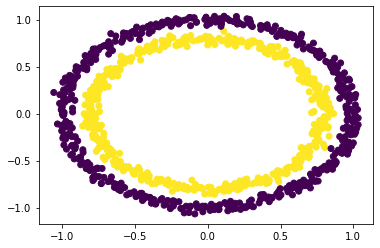

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

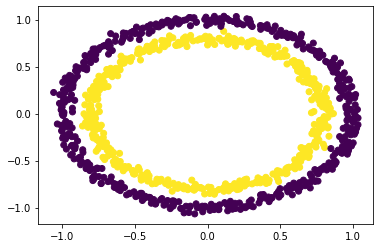

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

On peut maintenant comprendre que notre objectif ici est d'√™tre capable de distinguer les points jaunes des points fonc√©s.

## 3. Forme des donn√©es d'entr√©e (*inputs)* et de sortie (*outputs*)

Regardons les formes de nos donn√©es X et y :

In [ ]:
 ,

((1000, 2), (1000,))

In [14]:
X.shape, y.shape

((1000, 2), (1000,))

Logique, puisque nous avons bien 1000 observations s√©par√©es en 2 classes, ainsi que l'√©tiquette r√©elle correspondant √† la classe (0 ou 1) pour chaque observation.

Par exemple, aficchons les don√©nes correspondant √† la premi√®re observation :

In [ ]:
 , 

(array([0.75424625, 0.23148074]), 1)

In [16]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Notre r√©seau de neurones pour ce probl√®me de classification binaire devra donc :
- accepter en entr√©e un tenseur avec au moins une de ses dimensions √©gale √† 2 (les variables explicatives X0 et X1)
- fournir en sortie un tenseur avec au moins une de ses dimensions √©gale √† 1 (la classe pr√©dite par le mod√®le)

Place √† la mod√©lisation.

## 4. Mod√©lisation

Comme avec la r√©gression, nous aurons les 3 √©tapes typiques pour cr√©er et entra√Æner un mod√®le :
1. **Cr√©er un mod√®le** : assembler les couches d'un r√©seau de neurones soi-m√™me (√† l'aide de l'API [fonctionnelle Keras](https://www.tensorflow.org/guide/keras/functional) ou [s√©quentielle Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) ou importer un mod√®le d√©j√† construit pr√©c√©demment

2. **Compiler un mod√®le** : d√©finir comment les performances du mod√®le devraient se mesurer (fonction co√ªt/m√©trique) et comment les optimiser (optimizer)

3. **Entra√Æner un mod√®le** : laisser le mod√®le essayer de trouver les tendances (*patterns*) dans les donn√©es

Pour construire notre mod√®le pour notre probl√®me de classification, nous allons utiliser l'API s√©quentielle Keras : elle est disponible directement √† partir du module `keras` de TensorFlow.

Cr√©√©ons notre premier mod√®le et entra√Ænons-le √† partir de nos donn√©es (cr√©ation/compilation/entra√Ænement) :

Epoch 1/5
32/32 [==============================] - 0s 547us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 500us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 438us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 437us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 438us/step - loss: 0.6942 - accuracy: 0.4820


In [27]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
# une seule couche dense comportant 1 neurone
modele_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compilation du mod√®le
# fonction co√ªt : entropie crois√©e binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : SGD
# metrique de performance : l'exactitude (accuracy)
modele_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])


# 3. Entra√Ænement du mod√®le sur 5 √©poques
modele_1.fit(X, y, epochs=5, verbose=1)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6099 - mae: 0.6099
Epoch 2/5
32/32 [==============================] - 0s 924us/step - loss: 0.5324 - mae: 0.5324
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.5033 - mae: 0.5033
Epoch 4/5
32/32 [==============================] - 0s 948us/step - loss: 0.5004 - mae: 0.5004
Epoch 5/5
32/32 [==============================] - 0s 905us/step - loss: 0.5004 - mae: 0.5004


En regardant l'exactitude (*accuracy* en anglais), nous voyons que notre mod√®le donne de tr√®s mauvais r√©sultats (moins de 50% d'exactitude).

Et si l'on entra√Æne le m√™me mod√®le plus longtemps (par exemple sur 200 √©poques) ?

In [ ]:
# verbose=0 permet de ne pas afficher les informations pendant l'entra√Ænement sur chaque √©poque
modele_1.

In [30]:
modele_1.fit(X, y, epochs=200, verbose=0)

Evaluons le mod√®le r√©-entra√Æn√© avec la m√©thode `evaluate()` :

32/32 [==============================] - 0s 875us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

M√™me apr√®s 200 √©tapes d'entra√Æenemtn, le mod√®le est toujours aussi mauvais.

Essayons d'ajouter une couche et et d'entra√Æner ce nouveau mod√®le sur 100 √©poques :

In [33]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
# 2 couches denses comportant 1 neurone chacune
modele_2 = tf.keras.Sequential([tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)])

# 2. Compilation du mod√®le
# fonction co√ªt : entropie crois√©e binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : SGD
# metrique de performance : l'exactitude (accuracy)
modele_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])


# 3. Entra√Ænement du mod√®le sur 100 √©poques
modele_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluation du mod√®le √† l'aide de la m√©thode evaluate()
modele_2.evaluate()

32/32 [==============================] - 0s 753us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [37]:
modele_2.evaluate(X, y)

32/32 [==============================] - 0s 958us/step - loss: 0.5001 - mae: 0.5001


[0.5001184940338135, 0.5001184940338135]

Nous restons bloqu√©s √† 50% d'exactitude.

Essayons cette fois un mod√®le avec 3 couches denses de respectivement 100, 10 et 1 neurones et en utilisant l'optimiseur Adam (au lieu du SGD jusqu'√† pr√©ent), toujours avec un entra√Ænement sur 100 √©poques :

In [38]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
# 3 couches denses comportant respectivement 100, 10 et 1 neurones
modele_3 = tf.keras.Sequential([tf.keras.layers.Dense(100), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])

# 2. Compilation du mod√®le
# fonction co√ªt : entropie crois√©e binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

# 3. Entra√Ænement du mod√®le sur 100 √©poques
modele_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluation du mod√®le √† l'aide de la m√©thode evaluate()
modele_3.

32/32 [==============================] - 0s 559us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

Le r√©sultat est encore une fois toujours aussi mauvais !

Nous allons visualiser les pr√©dictions de notre mod√®le pour tenter de voir ce qu'il se passe.

Pour ce faire, nous allons cr√©er la fonction `plot_frontiere_decision()` qui permet de tracer la fronti√®re de d√©cision d'un mod√®le :

In [39]:
import numpy as np

def plot_frontiere_decision(model, X, y):
  """
  Trace la fronti√®re de d√©cision cr√©√©e par un mod√®le ayant faire des pr√©dictions √† partir de X.
  Cette fonction a √©t√© adapt√©e √† partir des ces deux sources majeures :
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Essayons maintenant cette fonction sur notre mod√®le `modele_3` pour v√©rifier visuellement les pr√©dictions que fait notre mod√®le :

doing binary classifcation...


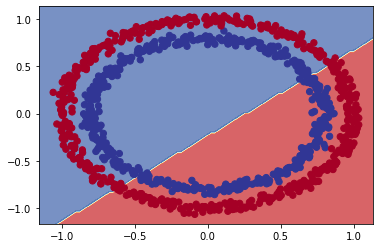

doing binary classifcation...


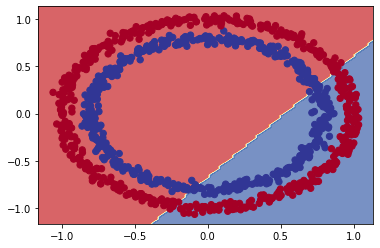

In [40]:
plot_frontiere_decision(modele_3, X, y)

Il semblerait que notre mod√®le essaie de s√©parer lin√©airement nos donn√©es, ce qui explique pourquoi les r√©sultats sont si mauvais.

## 5. La pi√®ce manquante : la non-lin√©arit√©

Avant d'aller plus loin, vous pouvez essayer d'exp√©rimenter diff√©rents r√©seaux de neurones sur ce tr√®s bon site [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).

Il permet d'avoir un aper√ßu visuel de l'entra√Ænement d'un r√©seau de neurones (ici, le lien donn√© est configur√© pour correspondre √† notre cas de figure, c'est-√†-dire √† un jeu de donn√©es formant 2 cercles concentriques).

Une fois l'exp√©rimentation faite, nous allons maintenant cr√©er un nouveau mod√®le et ajouter un nouveau param√®tre lors de la cr√©ation du mod√®le, le param√®tre `activation`.

Commen√ßons par cr√©er un mod√®le avec 2 couches :
- une premi√®re couche dense d'1 neurone en sp√©ficiant la fonction d'activation lin√©aire disponible dans le module `activations` de `Keras`
- une deuxi√®me couche dense (la couche de sortie) comportant 1 neurone, sans sp√©cifier le param√®tre de la fonction activation

Pour la compilation, nous pouvons garder l'optimiseur Adam ; on sp√©cifiera le param√®tre lr √† `0.001`, lr √©tant le taux d'apprentissage (*learning rate*).

Nous sauvegardons ensuite l'entra√Ænement (sur 100 √©poques) pour la visualisation des r√©sultats :

In [55]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
modele_4 = tf.keras.Sequential([tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)])

# 2. Compilation du mod√®le
# fonction co√ªt : entropie crois√©e binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_4.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. Entra√Ænement du mod√®le sur 100 √©poques
historique = modele_4.fit(X, y, epochs=100, verbose=0)

Il y a une l√©g√®re am√©lioration des r√©sultats mais toujours rien de fameux.

Visualisons la fronti√®re de d√©cision cr√©√©e par ce mod√®le :

doing binary classifcation...


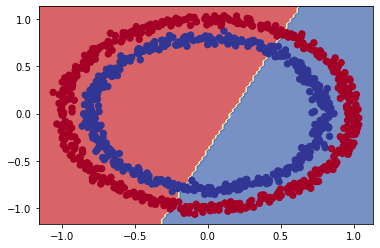

doing binary classifcation...


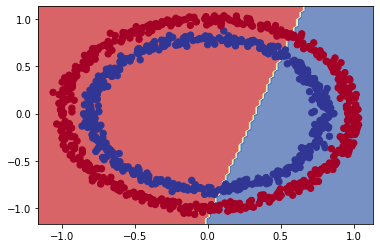

In [56]:
plot_frontiere_decision(modele_4, X, y)

La fronti√®re est toujours lin√©aire.

Vous aurez compris que nos donn√©es √©tant non-lin√©aires (les points de notre jeu de donn√©es forment 2 cercles), il faut que l'on puisse ajouter de la non-lin√©arit√© √† notre mod√®le pour esp√©rer am√©liorer nos r√©sultats.

Testons cette fois-ci la fonction d'activation `relu` (pour rectified linear unit), toujours sur la premi√®re couche :

doing binary classifcation...


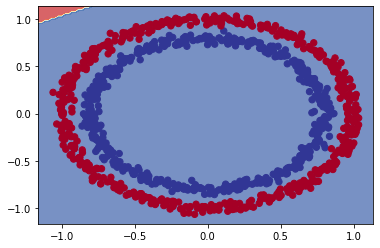

In [59]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
# 2 couches dense d'un neurone chacune
#choix de la fonction d'activation ReLU pour la premi√®re couche (hidden layer), la deuxi√®me couche correspond √† la couche de sortie (output layer)
modele_5 = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='relu'), tf.keras.layers.Dense(1)])

# 2. Compilation du mod√®le
# fonction co√ªt : entropie crois√©e binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_5.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. Entra√Ænement du mod√®le sur 100 √©poques
historique = modele_5.fit(X, y, epochs=100, verbose=0)
plot_frontiere_decision(modele_5, X, y)


doing binary classifcation...


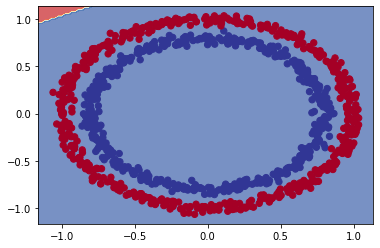

In [63]:
plot_frontiere_decision(modele_5, X, y)

Ne d√©sesp√©rez pas :) ! M√™me si les r√©sultats sont √† nouveau mauvais, cela fait partie de ce que vous exp√©rimenterez √©galement sur vos projets personnels et professionnels !

Encore un essai : nous allons cette fois-ci :
- augmenter le nombre de couches : 2 couches cach√©es de 4 neurones chacune et 1 couche de sortie comportant 1 neurone
- utiliser la fonction d'activation ReLU pour les 2 couches cach√©es

In [62]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
# choix de la fonction d'activation ReLU pour les deux premi√®res couches (hidden layers), la troisi√®me couche correspond √† la couche de sortie (output layer)
modele_6 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(1)])

# 2. Compilation du mod√®le
# fonction co√ªt : entropie crois√©e binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_6.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. Entra√Ænement du mod√®le sur 100 √©poques
historique = modele_6.fit(X, y, epochs=100, verbose=0)

Bon, les r√©sultats sont √† nouveau les m√™mes, mais visualisons tout de m√™me la fronti√®re de d√©cision pour voir si elle a chang√© ou non depuis notre derni√®re visualisation :

doing binary classifcation...


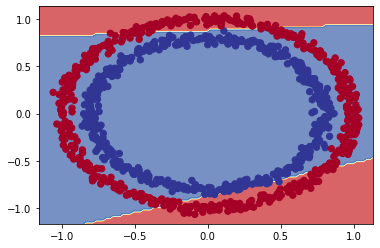

doing binary classifcation...


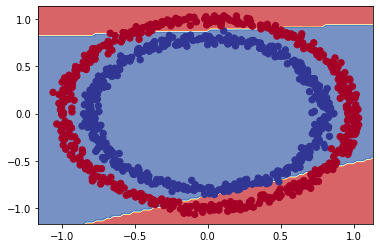

In [64]:
plot_frontiere_decision(modele_6, X, y)

Cette fois-ci, le mod√®le semblent cr√©er deux lignes droites.

Vous l'aurez compris : l'id√©e avec les mod√®les ci-dessus √©tait de vous faire manipuler les r√©seaux de neurones autour de la cr√©ation et du choix des valeurs de param√®tres.

Cette fois-ci, nous allons (enfin !) mod√©liser le cercle tant attendu.

Comment ? En sp√©cifiant la fonction d'activation pour la couche de sortie √©galement. Comme indiqu√© sur le tableau de la partie 1., nous allons choisir la fonction d'activation sigmo√Øde (pour le reste, nous conservons les m√™mes param√®tres que le mod√®le pr√©c√©dent `modele_6`) :

In [65]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
modele_7 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(1, activation="sigmoid")])

# 2. Compilation du mod√®le
# fonction co√ªt : entropie crois√©e binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_7.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. Entra√Ænement du mod√®le sur 100 √©poques
historique = modele_7.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluation du mod√®le
modele_7.

32/32 [==============================] - 0s 337us/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

In [67]:
modele_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Il semble que notre mod√®le ait atteint de tr√®s bons r√©sultats (98% d'exactitude) !

Visualisons la fronti√®re de d√©cision ; au vu des r√©sultats, on peut penser que la fronti√®re correspondra bien au cercle permettant de s√©parer les points des deux cercles concentriques :

doing binary classifcation...


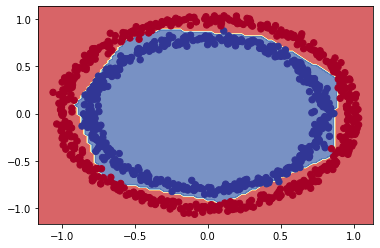

In [68]:
plot_frontiere_decision(modele_7, X, y)

C'est √† peu pr√®s le cas. Notre mod√®le semble s√©parer presque parfaitement nos donn√©es (√† part pour quelques points).

Cependant, voici une question tr√®s importante √† laquelle nous allons r√©pondre dans la partie qui suit : qu'est-ce qui ne va pas avec les √©valuations et les pr√©dictions que nous avons faites ? Est-ce que nous avons √©valu√© nos mod√®les correctement ?

Un indice pour ceux qui n'auraient pas encore la r√©ponse : quelles donn√©es ont permis d'entra√Æner le mod√®le ? Avec quelles donn√©es avons-nous fait nos pr√©dictions ?

## 6. Evaluation et am√©lioration de notre mod√®le de classification

### 6.1. Partage des donn√©es en un jeu d'entra√Ænement et un jeu de test

Vous avez probablement trouv√© ce qui n'allait pas : nous avons jusqu'ici √©valu√© nos mod√®les avec les m√™mes donn√©es utilis√©es pour l'entra√Ænement !

Une meilleure approche est de partager notre jeu de donn√©es en un jeu d'entra√Ænement, un jeu de validation (optionnel) et un jeu de test.

Pour la suite, nous allons nous contenter de partager notre jeu de donn√©es en un jeu d'entra√Ænement et un jeu de test.

Ainsi, nous entra√Ænerons nos mod√®les sur le jeu d'entra√Ænement et nous verrons ensuite comment le mod√®le performe (c'est-√†-dire voir comment sont les pr√©dictions faites par le mod√®le) sur le jeu de test.

Proc√©dons au partage des donn√©es `X` et `y`:

In [ ]:
# Jeu d'entra√Ænement
#
X_train, y_train = ,  # nous allons r√©server 80% des donn√©es pour le jeu d'entra√Ænement

# Jeu de test
X_test, y_test = ,  # nous allons r√©server 20% des donn√©es pour le jeu de test

train_test_split(X, y, test_size=0.2, random_state=42)

# V√©rification de la forme des donn√©es
 ,

((800, 2), (200, 2))

In [73]:
from sklearn.model_selection import train_test_split
# Jeu d'entra√Ænement
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# V√©rification de la forme des donn√©es
X_train.shape, X_test.shape

((800, 2), (200, 2))

Parfait.

Maintenant que nous avons nos jeux d'entra√Ænement et de test, nous pouvons entra√Æner le mod√®le sur le jeu d'entra√Ænement et ensuite l'√©valuer sur le jeu de test.

Nous allons garder le m√™me mod√®le que le pr√©c√©dent `modele_7` :
- en sp√©cifiant le taux d'apprentissage √† 0.01 pour l'optimizer Adam (par d√©faut, il est √©gal √† 0.001)
- en diminuant le nombre d'√©poques √† 25

In [74]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
modele_8 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(1, activation="sigmoid")])

# 2. Compilation du mod√®le
# fonction co√ªt : entropie crois√©e binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_8.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])

# 3. Entra√Ænement du mod√®le sur 25 √©poques
historique = modele_8.fit(X, y, epochs=25, verbose=0)



In [ ]:
# Evaluation de notre mod√®le sur le jeu de test
perte, exactitude = modele_8.
print(f"Perte du mod√®le sur le jeu de test: {perte}")
print(f"Exactitude du mod√®le sur le jeu de test: {100*exactitude:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
Perte du mod√®le sur le jeu de test: 0.12468847632408142
Exactitude du mod√®le sur le jeu de test: 100.00%


In [76]:
perte, exactitude = modele_8.evaluate(X_test, y_test)
print(f"Perte du mod√®le sur le jeu de test: {perte}")
print(f"Exactitude du mod√®le sur le jeu de test: {100*exactitude:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9850
Perte du mod√®le sur le jeu de test: 0.1417662650346756
Exactitude du mod√®le sur le jeu de test: 98.50%


100% d'exactitude !

Quelques remarques :
- le param√®tre `activation` : dans TensorFlow, on peut utiliser par exemple `relu` ou `sigmoid` au lieu des chemins des biblioth√®ques (par exemple `tf.keras.activations.relu`)
- le taux d'apprentissage `lr` : nous avons augment√© la valeur de ce param√®tre dans l'[optimiseur Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) de 0.001 √† 0.01
    - vous pouvez voir le taux d'apprentissage comme la vitesse √† laquelle le mod√®le apprend : plus le taux est grand, plus le mod√®le apprend vite
    - cependant, avec un taux d'apprentissage **trop grand**, le mod√®le essaie d'apprendre trop vite et n'apprend finalement rien
- le nombre d'√©poques : nous l'avons diminu√© de 100 √† 25 mais notre mod√®le a tout de m√™me conserv√© de tr√®s bons r√©sultats √† la fois lors de l'entra√Ænement mais √©galement lorsque nous l'avons √©valu√© sur le jeu de test
    - une des raisons de la bonne performance de notre mod√®le m√™me avec un nombre d'√©poques plus faible est que nous avons dans le m√™me temps augmenter le taux d'apprentissage
    - faites le test : garder le nombre d'√©poques √† 25 et sp√©cifier le taux d'apprentissage √† 0.001 (la valeur par d√©faut pour l'optimiseur Adam) et vous verrez que les r√©sultats seront beaucoup moins bons

Nous savons que notre mod√®le `modele_8` donnent d'excellents r√©sultats gr√¢ce √† notre m√©trique d'√©valuation (l'exactitude ou *accuracy* en anglais) mais regardons visuellement comment cela se traduit :

doing binary classifcation...
doing binary classifcation...


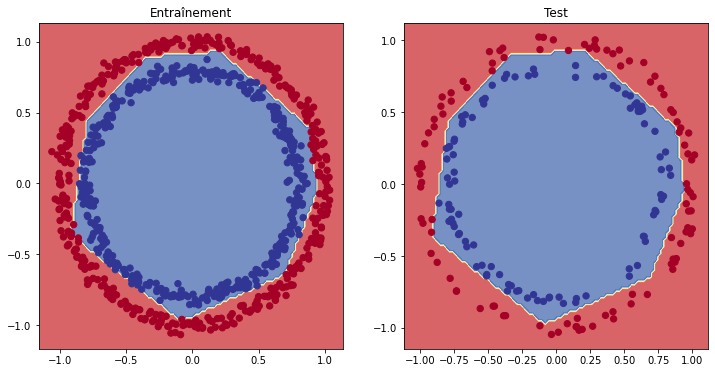

In [ ]:
# Tracer les fronti√®res de d√©cision pour le jeu d'entra√Ænement et le jeu de test
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entra√Ænement")
plot_frontiere_decision(, , )
plt.subplot(1, 2, 2)
plt.title("Test")
plot_frontiere_decision(, , )
plt.show()

doing binary classifcation...
doing binary classifcation...


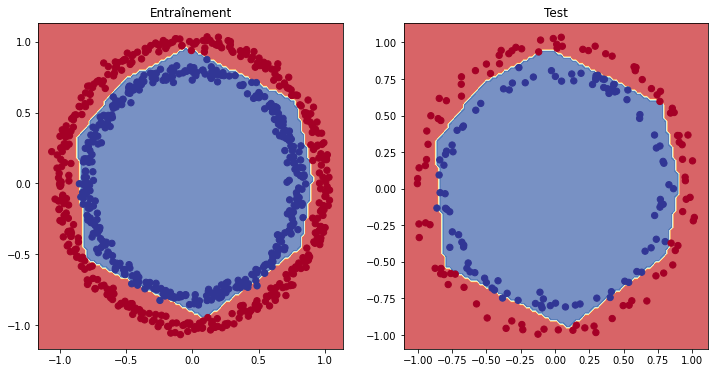

In [77]:
# Tracer les fronti√®res de d√©cision pour le jeu d'entra√Ænement et le jeu de test
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entra√Ænement")
plot_frontiere_decision(modele_8, X_train, y_train )
plt.subplot(1, 2, 2)
plt.title("Test")
plot_frontiere_decision(modele_8,X_test , y_test )
plt.show()

Notre mod√®le est capable de pr√©dire presque parfaitement l'appartenance des points (rouges ou bleus).

### 6.2. Courbes d'apprentissage

Nous pouvons √©galement tracer les courbes d'apprentissages (parfois √©galement appel√©es *loss curves* ou courbes de pertes) pour voir comment notre mod√®le √©volue pendant l'entra√Ænement.

Nous allons (enfin !) utiliser la variable `historique`: nous allons faire appel au param√®tre `history`, puis nous allons enregistrer les donn√©es dans un `Dataframe` et faire appel √† la m√©thode `plot()` du DataFrame :

In [ ]:
# Acc√®s √† l'historique (pertes, exactitude) du mod√®le pour chaque √©poque lors de l'entra√Ænement


loss  accuracy
0   0.684651   0.54250
1   0.677721   0.55250
2   0.673595   0.55125
3   0.668149   0.57750
4   0.663269   0.58500
5   0.654567   0.58375
6   0.641258   0.67500
7   0.626428   0.70125
8   0.603831   0.74875
9   0.571404   0.77375
10  0.540443   0.76500
11  0.501504   0.78375
12  0.468332   0.79750
13  0.411302   0.84500
14  0.362506   0.91250
15  0.320904   0.93125
16  0.284708   0.94875
17  0.259720   0.95250
18  0.237469   0.95625
19  0.213520   0.96625
20  0.193820   0.97750
21  0.175244   0.97375
22  0.161893   0.97875
23  0.154989   0.97750
24  0.148973   0.97625

In [82]:
df = pd.DataFrame({'loss': historique.history['loss'], 'accuracy': historique.history['accuracy']})
df

loss  accuracy
0   0.683428     0.555
1   0.676111     0.563
2   0.669990     0.560
3   0.661518     0.596
4   0.655262     0.585
5   0.638609     0.636
6   0.614991     0.689
7   0.564100     0.748
8   0.510077     0.809
9   0.445113     0.855
10  0.410661     0.825
11  0.372242     0.877
12  0.310569     0.940
13  0.276162     0.950
14  0.242122     0.967
15  0.211573     0.980
16  0.192562     0.978
17  0.171821     0.983
18  0.159929     0.976
19  0.141902     0.982
20  0.137538     0.983
21  0.129990     0.982
22  0.121929     0.984
23  0.110160     0.982
24  0.107251     0.983

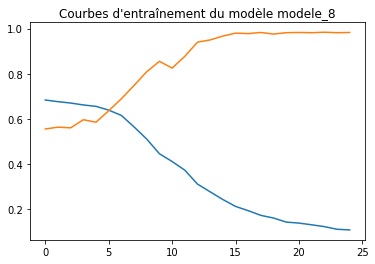

In [84]:
# Visualisation des courbes

plt.title("Courbes d'entra√Ænement du mod√®le modele_8");
plt.plot(df)

C'est le trac√© id√©al qui est recherch√© lorsque l'on traite un probl√®me de classification, les pertes diminuant et l'exactitude augmentant au fur et √† mesure de l'entra√Ænement.

### 6.3. Trouver le bon taux d'apprentissage

En dehors du choix de l'architecture en elle-m√™me (les couches, le nombre de neurones, le choix de la fonction d'activation, etc ...), l'hyperparam√®tre le plus important sur lequel vous pouvez jouer lorsque vous ajustez votre r√©seau de neurones est le taux d'apprentissage (*learning rate*).

Dans `modele_8`, nous avons augment√© le taux d'apprentissage de l'optimiseur Adam √† 0.01 (sur les mod√®les pr√©c√©dents, nous n'avions pas sp√©cifi√© le param√®tre `lr`; la valeur par d√©faut de 0.001 √©tait donc celle qui √©tait prise en compte).

Certains se demandent peut-√™tre pourquoi ce choix d'augmenter le taux d'apprentissage.

C'√©tait en fait un simple essai, qui s'est r√©v√©l√© bon.

Avec le temps, vous apprendrez √† voir quel genre de modification sur tel ou tel hyperparam√®tre fonctionne ou non.

Revenons concr√®tement au taux d'apprentissage.

Voici une astuce pour trouver le taux d'apprentissage optimal (au moins pour commencer l'entra√Ænement des mod√®les) :
- un learning rate callback
- vous pouvez voir ce "rappel" comme une fonctionnalit√© que vous pouvez choisir d'ajouter lors de l'entra√Ænement de votre mod√®le
- nous allons sp√©cifi√© une plage de valeur pour le taux d'apprentissage et celui-ci va √™tre augment√© au fur et √† mesure de l'entra√Ænement

Nous allons donc reprendre notre meilleur mod√®le jusqu'ici, `modele_8` auquel nous allons impl√©menter cette fonctionnalit√© :

In [ ]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
modele_9 = 

# 2. Compilation du mod√®le
# on ne sp√©cifie plus de valeur pour le param√®tre lr ici
modele_9.

# 3. Cr√©ation du scheduler du taux d'apprentissage
# Utilisation du module LearningRateScheduler de keras.callback
# le taux d'apprentissage prendra des valeurs √† partir de 1e-4, en augmentant de 10**(epoch/20) √† chaque √©poque
lr_scheduler = 

# 4. Entra√Ænement du mod√®le sur 100 √©poques
historique = modele_9.

Epoch 1/100
25/25 [==============================] - 0s 589us/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 527us/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 480us/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 520us/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 480us/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 480us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 480us/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 480us/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 560us/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 440us/step - loss: 0.6871 - accura

In [ ]:
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
modele_9 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(4, activation='relu'), tf.keras.layers.Dense(1, activation="sigmoid")])

# 2. Compilation du mod√®le
modele_9.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])


# 3. Cr√©ation du scheduler du taux d'apprentissage
# Utilisation du module LearningRateScheduler de keras.callback
# le taux d'apprentissage prendra des valeurs √† partir de 1e-4, en augmentant de 10**(epoch/20) √† chaque √©poque
lr_scheduler = 

# 4. Entra√Ænement du mod√®le sur 100 √©poques
historique = modele_9.fit(X, y, epochs=100, verbose=0)

L'entra√Ænement de notre mod√®le √©tant termin√©, regardons l'historique d'entra√Ænement (comme nous l'avons fait avec le mod√®le `modele_8`) :

Text(0.5, 1.0, "Courbes d'entra√Ænement du mod√®le modele_9")

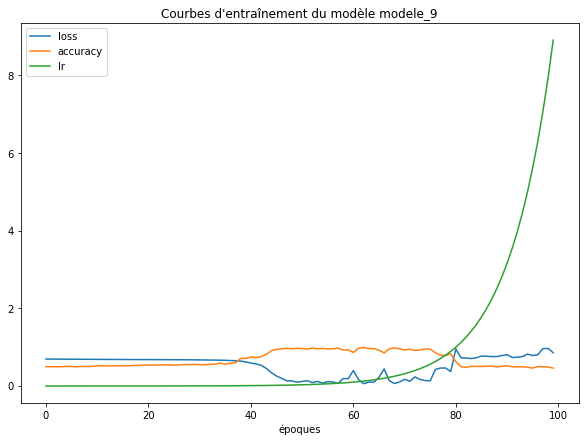

In [ ]:

plt.title("Courbes d'entra√Ænement du mod√®le modele_9")

Comme vous pouvez le voir, le taux d'apprentissage augmente exponentiellement en fonction du nombre d'√©poques.

On peut √©galement constater que l'exactitude de notre mod√®le augmente (et l'erreur diminue) √† un point donn√©, lorsque le taux d'apprentissage comment √† l√©g√®rement augmenter (entre les √©poques 30 et 40).

Pour conna√Æter avec plus de pr√©cision o√π se trouve ce point d'inflexion, nous pouvons tracer les pertes en fonction du taux d'apprentissage sur une √©chelle log (en utilisant par exemple `plt.semilogx()`) :

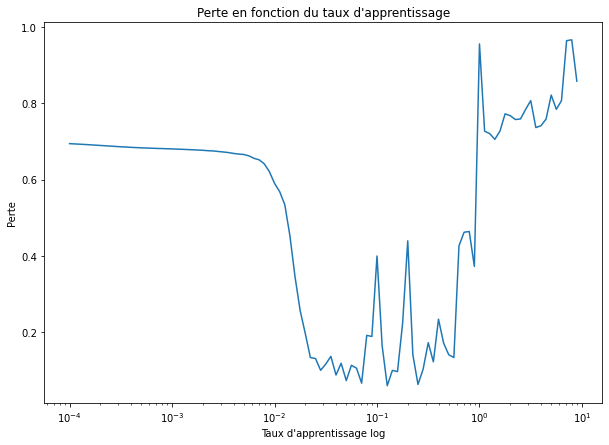

In [ ]:
# on d√©finit notre plage de valeur pour le taux d'apprentissage
lrs = 1e-4 * (10 ** (np.arange(100)/20))

plt.figure(figsize=(10, 7))

# on passe le taux d'apprentissage en √©chelle logarithmique (en abscisse) avec la fonction plt.semilogx()
# perte en ordonn√©e

plt.xlabel("Taux d'apprentissage log")
plt.ylabel("Perte")
plt.title("Perte en fonction du taux d'apprentissage");

La r√®gle empirique pour trouver la valeur id√©ale du taux d'apprentissage (au moins la valeur id√©ale pour commencer l'entra√Ænement de notre mod√®le) est de prendre la valeur du taux d'apprentissage o√π les pertes continuent toujours de diminuer mais qu'elles n'ont toujours pas atteint le minimum.

Dans notre cas, notre taux d'apprentissage ideal se situe entre `0.01` ($10^{-2}$) et `0.02`.

Nous pouvons maintenant cr√©er un nouveau mod√®le (en repartant du mod√®le `modele_8` avec un entra√Ænement sur 20 √©poques) en fixant le taux d'apprentissage `lr` √† `0.02` :

In [ ]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
modele_10 = 

# 2. Compilation du mod√®le
# fonction co√ªt : entropie crois√©e binaire puisque nous travaillons avec 2 classes ici (0 et 1)
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)
modele_10.

# 3. Entra√Ænement du mod√®le sur 20 √©poques
historique = 

Epoch 1/20
25/25 [==============================] - 0s 922us/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 480us/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 479us/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 520us/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 440us/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 480us/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 480us/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 520us/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 469us/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 569us/step - loss: 0.2512 - accuracy: 0.9500

Avec un taux d'apprentissage un peu plus √©lev√© (`0.02` au lieu de `0.01`), nous avons une exactitude plus √©lev√©e que `modele_8` en moins d'√©poques (`20` au lieu de `25`).

Evaluons ce mod√®le sur le jeu de test :

7/7 [==============================] - 0s 662us/step - loss: 0.0574 - accuracy: 0.9900


[0.05740182474255562, 0.9900000095367432]

Tra√ßons les pr√©dictions, toujours √† l'aide de la fonction `plot_frontiere_decision()` :

doing binary classifcation...
doing binary classifcation...


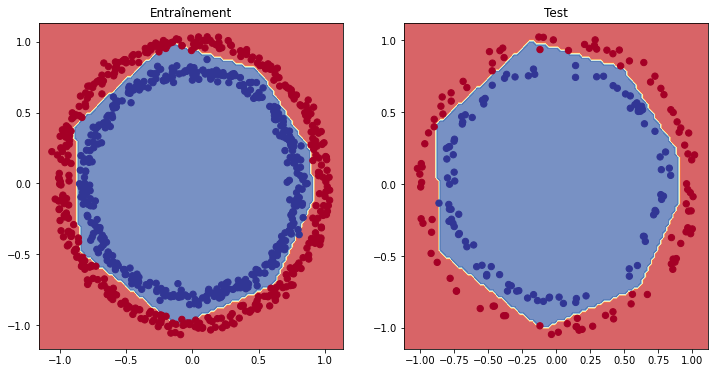

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entra√Ænement")
plot_frontiere_decision(, , )
plt.subplot(1, 2, 2)
plt.title("Test")
plot_frontiere_decision(, , )
plt.show()

Nous avons la confirmation visuelle que notre mod√®le se comporte quasiment parfaitement.

**Remarque :**
- si ce mod√®le devait √™tre utilis√© en environnement de production, il faudrait s'assurer qu'il se g√©n√©ralise bien (en mettant par exemple des outils de monitoring)

### 6.4. D'autres m√©thodes d'√©valuation pour la classification

En dehors des visualisations que nous faisons, il y a beaucoup de m√©triques diff√©rentes que nous pouvons utiliser pour la classification.

En voici quelques unes des plus courantes :

| **M√©trique/m√©thode d'√©valuation** | **D√©fintion** | **Code (lien)** |
| --- | --- | --- |
| Exactitude | Sur 100 pr√©dictions, combien de fois le mod√®le donne la bonne pr√©diction ? Par exemple 95% d'exactitude signifie que le mod√®le fait 95/100 pr√©dictions correctes. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Pr√©cision | Proportion des vrais positifs par rapport au nombre total d'observations. Une plus grande pr√©cision signifie moins de faux positifs (le mod√®le pr√©dit 1 lorsqu'il aurait fallu pr√©dire 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Rappel | Proportion des vrais positifs par rapport au nombre total de vrais prositifs et de faux positifs. Un rappel plus grand signifie moins de faux n√©gatifs (le mod√®le pr√©dit 0 lorsqu'il aurait fallu pr√©dire 1). | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| Score F1 | Combinaison de la pr√©cision et du rappel dans une seule m√©trique, 1 √©tant le meilleur score et 0 le plus mauvais. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Matrice de confustion](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Comparaison des valeurs pr√©dites par rapport aux vraies valeurs, sous forme de tableau ; si 100% correct, toutes les valeurs de la matrice formeront une diagonale. | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Rapport de m√©triques | Rapport texte des principales m√©triques pour la classification, telles que la pr√©cision, le rappel et le score F1. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

## 7. Classification multi-classes

### 7.1. Mod√©lisation

Nous allons aborder un exemple de classification multi-classes dans cette partie.

Nous allons cette fois-ci directement charger un jeu de donn√©es disponible dans le module `datasets` de Keras.

C'est un jeu de donn√©es d√©j√† pr√©-trait√©s (donn√©es num√©riques) cr√©√© par [Zalando](https://github.com/zalandoresearch/fashion-mnist) .

Notre objectif avec ce dataset va √™tre de cr√©er un mod√®le capable de pr√©dire si un v√™tement est une chaussure, un T-shirt, une veste, etc ...

En plus d'√™tre pr√©-trait√©es, les donn√©es ont d√©j√† √©t√© partag√©es en un jeu d'entra√Ænement et un jeu de test pour nous ; nous n'avons plus qu'√† les charger √† l'aide de la fonction `fashion_mnist.load_data()` :

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

Regardons √† quoi ressemblent les donn√©es, par exemple pour la premi√®re observation :

In [ ]:
print(f"Observation d'entra√Ænement:\n{train_data[0]}\n") 
print(f"Label: {train_labels[0]}")

Observation d'entra√Ænement:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0  

Cela nous fait une grande liste de nombres pour notre observation.

L'√©tiquette est repr√©sent√©e par un nombre unique.

Qu'en est-il de la forme des donn√©es d'entra√Ænement et de test ?

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Si nous prenons une observation donn√©e, qu'en est-il de sa forme ?

In [ ]:
, 

((28, 28), ())

Nous avons donc :
- 60 000 observations d'entra√Ænement
- 10 000 observations pour le jeu de test
- chacune de ces observations √©tant de dimension 28*28
- chaque observation √©tant √©tiquett√©e par un nombre (l'√©tiquette)

Chaque observation repr√©sente finalement l'image d'un v√™tement : cette image a √©t√© transform√©e sour forme num√©rique (une matrice 28*28 de nombres, chaque nombre repr√©sentant un pixel de l'image d'origine).

Visualisons une des observations √† l'aide de la fonction `pyplot` de Matplotlib :

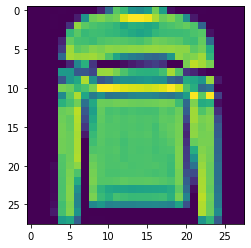

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[5]);

Voici l'√©tiquette associ√©e √† cette image :

2

Comme dit plus haut, ces donn√©es sont sous forme num√©rique, ce qui est parfait pour un r√©seau de neurones.

Mais il serait plus pratique, pour nous humains (üòä !) d'avoir le nom associ√©e √† la classe (chaussure, robe, veste, ect...).

Cette liste est justement donn√©e sur [la page GitHub du dataset](https://github.com/zalandoresearch/fashion-mnist#labels).

Nous allons recr√©er cette liste :

In [ ]:
noms_etiquettes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Nous avons donc 10 classes au total.

Nous allons construire un r√©seau de neurones capable de trouver les relations entre les valeurs de pixels et l'√©tiquette associ√©e :
- puisque nous avons des donn√©es d'entr√©e de forme 28x28, nous allons "aplanir" les donn√©es dans un tenseur de forme (784)
    - nous allons ainsi devoir sp√©cifier une nouvelle couche, la couche d'entr√©e (*input layer*)
    - on utilisera pour ceci la fonction `tf.keras.layers.Flatten()` en y sp√©cifiant le param√®tre `input_shape=(28,28)`
- la forme des donn√©es de sortie sera 10, notre mod√®le devant pr√©dire 10 classes diff√©rentes
    - il nous faudra donc modifier le nombre de neurones de la couche de sortie √† 10
- nous allons cette fois-ci faire le choix de la fonction d'activation `softmax` (au lieu de `sigmoid`) pour la couche de sortie
    - cette fonction d'activation est adapt√©e √† la classification multi-classes
- nous devons changer notre fonction de perte : nous allons utiliser la fonction [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)
- lors de l'entra√Ænement, nous allons utiliser un nouvel hyperparam√®tre, `validation_data`
    - ce param√®tre va nous donner une id√©e de la fa√ßon dont le mod√®le performe sur le jeu de test pendant l'entra√Ænement

Entra√Ænons ce mod√®le sur le jeu d'entra√Ænement (nous garderons les m√™me couches cach√©es que pr√©c√©demment) :

In [ ]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
fashion_1 = 

# 2. Compilation du mod√®le
# optimizer : Adam (garder le taux d'apprentissage par d√©faut)
# metrique de performance : l'exactitude (accuracy)
fashion_1.

# 3. Entra√Ænement du mod√®le sur 10 √©poques
# param√®tre validation_data √† sp√©cifier
historique = 

Epoch 1/10
1875/1875 [==============================] - 1s 669us/step - loss: 2.1637 - accuracy: 0.1620 - val_loss: 1.7923 - val_accuracy: 0.2180
Epoch 2/10
1875/1875 [==============================] - 1s 626us/step - loss: 1.7032 - accuracy: 0.2549 - val_loss: 1.6518 - val_accuracy: 0.2843
Epoch 3/10
1875/1875 [==============================] - 1s 626us/step - loss: 1.6346 - accuracy: 0.2830 - val_loss: 1.6242 - val_accuracy: 0.2824
Epoch 4/10
1875/1875 [==============================] - 1s 667us/step - loss: 1.6107 - accuracy: 0.2853 - val_loss: 1.6089 - val_accuracy: 0.2885
Epoch 5/10
1875/1875 [==============================] - 1s 671us/step - loss: 1.5959 - accuracy: 0.3069 - val_loss: 1.5744 - val_accuracy: 0.3328
Epoch 6/10
1875/1875 [==============================] - 1s 632us/step - loss: 1.5901 - accuracy: 0.3089 - val_loss: 1.5717 - val_accuracy: 0.3059
Epoch 7/10
1875/1875 [==============================] - 1s 648us/step - loss: 1.5815 - accuracy: 0.3167 - val_loss: 1.5631 -

In [ ]:
fashion_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_27 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Notre mod√®le obtient donc environ 33% d'exactitude apr√®s 10 √©poques, en utilisant un mod√®le similaire √† ceux utilis√©s pour notre probl√®me de classification binaire pr√©c√©dent.

Ce qui est mieux que de devoir deviner (deviner reviendrait √† 10% d'exactitude avec 10 classes) mais nous pouvons assur√©ment faire mieux.

### 7.2. Transformation min-max

Les r√©seaux de neurones pr√©f√®rent les nombres compris entre 0 et 1.

V√©rifions la plage de valeurs de nos donn√©es :

In [ ]:
# V√©rifier les valeurs min et max de nos donn√©es d'entra√Ænement et de test
, , , , 

(0, 255, 0, 255)

Nous pouvons transformer nos donn√©es et les ramener √† une plage entre 0 et 1 en les divisant par le maximum qui est `255.0` : c'est ce que l'on appelle la **transformation min-max** (appel√©e en anglais *min-max scaling* ou parfois *normalization*).

In [ ]:
# Division des jeux d'entra√Ænement et de test par leur valeur maximale
train_data = 
test_data = 

# V√©rifer √† nouveau les valeurs min et max de nos donn√©es d'entra√Ænement
, 

(0.0, 1.0)

Entra√Ænons √† nouveau le m√™me modele que pr√©c√©demment avec ces nouvelles donn√©es transform√©es :

In [ ]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
fashion_2 = 

# 2. Compilation du mod√®le
# optimizer : Adam (garder le taux d'apprentissage par d√©faut)
# metrique de performance : l'exactitude (accuracy)


# 3. Entra√Ænement du mod√®le sur 10 √©poques
historique_transf = 

Epoch 1/10
1875/1875 [==============================] - 1s 668us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 1s 644us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

Impressionnant ! Une simple transformation min-max nous a permis de plus que doubler notre exactitude (80%) !

Tra√ßons graphiquement les courbes d'entra√Ænement de nos 2 mod√®les (m√™me m√©thode que pour la classification binaire : passage des donn√©es sous forme de DataFrame puis utilisation de la m√©thode plot() du dataFrame) :

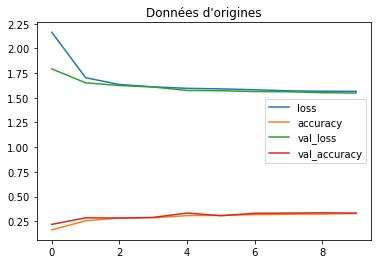

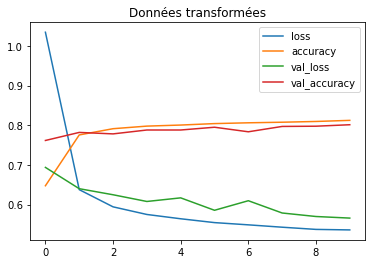

Nous pouvons voir ici comment notre mod√®le avec les donn√©es transform√©es a pu apprendre beaucoup plus rapidement (avec d√©j√† une exactitude beaucoup plus √©lev√©e d√®s la premi√®re √©poque).

### 7.3. Taux d'apprentissage id√©al

Nous allons maintenant essayer de trouver le taux d'apprentissage id√©al, en employant la m√™me m√©thode que pour la classification binaire :

In [ ]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
fashion_3 = 

# 2. Compilation du mod√®le
# optimizer : Adam (ne pas sp√©cifier le taux d'apprentissage)
# metrique de performance : l'exactitude (accuracy)


# 3. Cr√©ation du scheduler du taux d'apprentissage
# le taux d'apprentissage prendra des valeurs √† partir de 1e-3, en augmentant de 10**(epoch/20) √† chaque √©poque
lr_scheduler = 

# 4. Entra√Ænement du mod√®le sur 40 √©poques
# le mod√®le pr√©c√©dent donnant d√©j√† des r√©sultats corrects, nous n'aurons probablement pas besoin de 100 √©poques, d'o√π le choix de 40 √©poques ici
historique_transf_lr = 

Epoch 1/40
1875/1875 [==============================] - 1s 750us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 1s 719us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 1s 690us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 1s 675us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 1s 673us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 1s 669us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 1s 671us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 -

Tra√ßons le r√©sultat (idem que pour la classification binaire) :

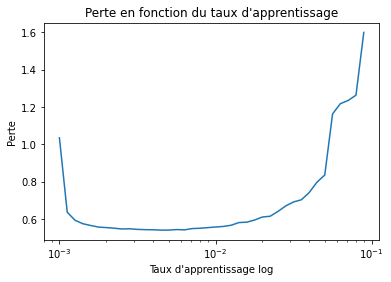

In [ ]:
lrs = 1e-3 * (10**(np.arange(40)/20))

plt.xlabel("Taux d'apprentissage log")
plt.ylabel("Perte")
plt.title("Perte en fonction du taux d'apprentissage");

Ici, la valeur id√©ale se situe quelque part proche du taux d'apprentissage par d√©faut de l'optimiseur Adam (`0.001`).

Entra√Ænons un nouveau mod√®le en utilisant cette valeur :

In [ ]:
# Choix du nombre al√©atoire (pour la reproductibilit√© des calculs)
tf.random.set_seed(42)

# 1. Cr√©ation d'un mod√®le en utilisant l'API s√©quentielle
fashion_4 = 

# 2. Compilation du mod√®le
# optimizer : Adam
# metrique de performance : l'exactitude (accuracy)


# 3. Entra√Ænement du mod√®le sur 20 √©poques
historique_transf = 

Epoch 1/20
1875/1875 [==============================] - 1s 704us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 1s 671us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 1s 641us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 1s 644us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 1s 651us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 1s 654us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 1s 694us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

Maintenant que nous avons un mod√®le entra√Æn√© avec un taux d'entra√Ænement proche de celui id√©al et qui performe plut√¥t bien, nous pourrions :
- √©valuer ses performances en utilisant d'autres m√©triques pour la classification
- afficher ses pr√©dictions
- am√©liorer son exactitude (par exemple en l'enta√Ænant plus longtemps ou en changeant son architecture)
- le sauvegarder et l'exporter pour l'utiliser dans une application

Ici, nous allons nous limiter aux deux premiers points.

### 7.4. Matrice de confusion

Commen√ßons par faire nos pr√©dictions sur le jeu de test en utilisant la m√©thode `predict()` de notre meilleur mod√®le `fashion_4` :

In [ ]:
y_proba = 

# Afficher les pr√©dictions de quelques observations (les 5 premi√®res par exemple)


array([[8.56298019e-11, 3.53616252e-13, 2.66337756e-05, 4.63561953e-08,
        5.09497040e-05, 9.61193666e-02, 8.17781896e-08, 9.18689221e-02,
        4.06052731e-03, 8.07873547e-01],
       [3.42785211e-06, 1.28992159e-16, 9.59891498e-01, 2.05163147e-07,
        1.53291877e-02, 2.45323401e-13, 2.41428781e-02, 1.13834485e-28,
        6.32722571e-04, 4.47892141e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38671428e-08, 3.34058655e-03,
        1.32495097e-05, 1.43834339e-21, 8.27906115e-06, 7.32382985e-18,
        5.48116041e-08, 4.92254248e-14],
       [7.50313629e-05, 9.90536869e-01, 4.25286942e-07, 9.22316313e-03,
        1.36231683e-04, 1.82763695e-18, 2.68082422e-05, 4.81250172e-14,
        1.45215347e-06, 2.22115451e-11],
       [7.21898302e-02, 1.54957206e-06, 2.55669117e-01, 1.03631085e-02,
        4.35413457e-02, 1.10694494e-13, 6.16930127e-01, 6.75444038e-23,
        1.30491669e-03, 1.21403809e-09]], dtype=float32)

Nous pouvons voir que la m√©thode `predict()` nous renvoie les probabilit√©s de pr√©diction, c'est-√†-dire les probabilit√©s d'appartenance aux classes (donc 10 probabilit√©s par observation, avec la somme √©gale √† 100%).

Ainsi, pour la premi√®re observation, la probabilit√© la plus forte est celle de l'√©tiquette 9 (80,8 %) : c'est donc cette classe que notre mod√®le pr√©dira pour cette observation.

Nous pouvons trouver la classe de la probabilit√© la plus grande en utilisant la m√©thode `argmax()` :

In [ ]:
# Classe de la plus grande probabilit√©, nom de la classe (par exemple pour la premi√®re observation)
, 

(9, 'Ankle boot')

Faisons maintenant cela pour l'ensemble des pr√©dictions :

In [ ]:
# Vecteur contenant la classe de la plus grande probabilit√© pour chaque observation (en utilisant la m√©thode argmax() par exemple)
y_preds = 

# R√©sultat pour les 10 premi√®res observations


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

Parfait.

Maintenant que nous avons nos pr√©dictions sous forme d'√©tiquettes, nous allons cr√©er la matrice de confusion pour les comparer aux vrais √©tiquettes :

In [ ]:
# Cr√©ation de la matrice de confusion √† l'aide du module confusion_matrix de sklearn

from sklearn.metrics import confusion_matrix
matrice_confusion = 
matrice_confusion

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

Il est souvent plus pratique d'examiner une repr√©sentation graphique de la matrice de confusion, obtenue gr√¢ce √† la fonction `matshow()` de Matplotlib :

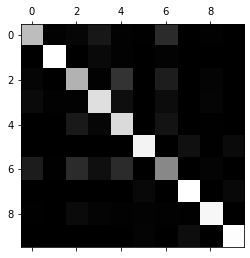

In [ ]:
plt.matshow(matrice_confusion, cmap=plt.cm.gray)
plt.show()

Si vous pr√©f√©rez une repr√©sentation graphique color√©e :

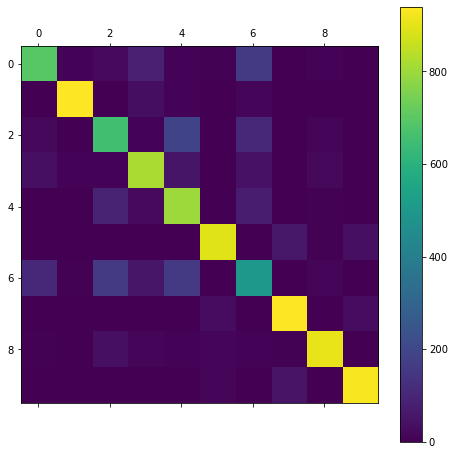

In [ ]:
def plot_matrice_confusion(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plot_matrice_confusion(matrice_confusion)

Voici une impl√©mentation un peu plus complexe mais qui permet d'afficher les probabilit√©s d'appartenance :

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

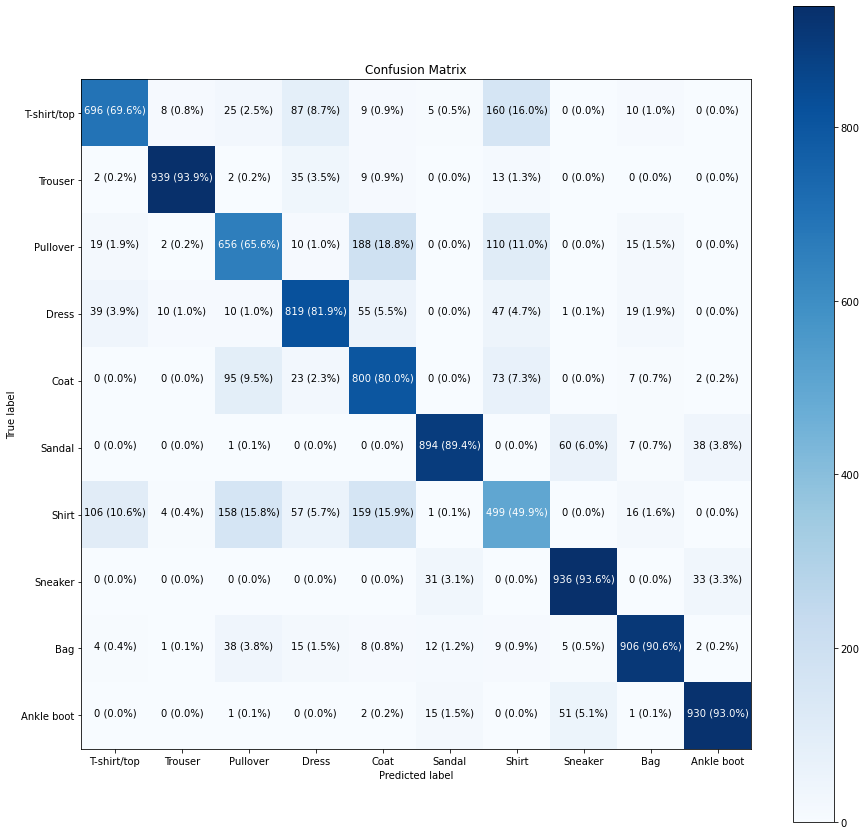

In [ ]:
make_confusion_matrix(y_true=test_labels, y_pred=y_preds,classes=noms_etiquettes,figsize=(15, 15),text_size=10)

L'affichage est plus int√©ressant ici.

Nous pouvons voir que les r√©sultats ne sont pas aussi bons qu'ils pourraient : par exemple, notre mod√®le confond les classes `shirt` et `T-shirt/top` (il pr√©dit la classe `Shirt` alors que la vraie √©tiquette correspond √† la classe `T-shirt/top`).

### 7.5. Visualisation des pr√©dictions

Voici une fonction qui s√©lectionnera al√©atoirement une observation dans notre jeu (une image) et qui l'affichera avec la pr√©diction du mod√®le choisi :

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

Regardons le r√©sultat :

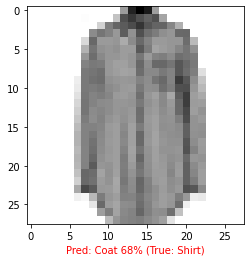

In [ ]:
plot_random_image(model=fashion_4, images=test_data, true_labels=test_labels, classes=noms_etiquettes)

Apr√®s avoir lanc√© plusieurs fois la cellule ci-dessus, vous commencerez √† avoir une compr√©hension visuelle de la relation entre les pr√©dictions du mod√®le et les vraies √©tiquettes.

Globalement, il semblerait que notre mod√®le m√©lange les classes qui sont similaires (comme par exemple `Sneaker` et `Ankle boot`).

Un des axes d'am√©lioration possibles serait de corriger ce probl√®me.